## Задание
Реализовать в ООП формате задания из уроков 3 и 4 

In [111]:
import cianparser
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

#### Загрузка и сохранение данных
Создаем и проверяем класс DataLoader для загрузки данных из Циана с помощью библиотеки cianparser и c сайта наш.дом.рф, находящегося в файле pickle

In [81]:
class Dataloader():
    def __init__(self):
        self.data = None
    def load_data(self, data):
        self.data = cianparser.CianParser(location="Москва").get_flats(deal_type="sale", rooms=(1, 2), with_saving_csv=True, additional_settings={"start_page":1, "end_page":20})
    def load_data_from_pickle(self, file_path):
        self.data = pd.read_pickle(file_path)
        return self.data
    def save_to_excel(self, data, name):
        pd.DataFrame(data).to_excel(f'{name}.xlsx')
    def save_to_pickle(self, data, name):
        pd.DataFrame(data).to_pickle(f'{name}.pkl')
    def save_to_db(self, db_name, data, table_name):
        conn = sqlite3.connect(f'{db_name}.db')
        pd.DataFrame(data).to_sql(name=table_name,con=conn)

In [49]:
dl = Dataloader().load_data(data)


                              Preparing to collect information from pages..
The absolute path to the file: 
/home/vladimir/Desktop/DS school/DS_School/lesson_5_homework/cian_flat_sale_1_20_moskva_20_Jul_2024_13_20_07_659683.csv 

The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1&room2=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 5 %. Average price: 314 344 936 rub
 2 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 56. Progress ratio: 10 %. Average price: 350 126 211 rub
 3 | 3 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 84. Progress ratio: 15 %. Average price: 371 383 161 rub
 4 | 4 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | C

In [55]:
Dataloader().save_to_excel(data=dl, name='cian_parsed')

In [62]:
Dataloader().save_to_pickle(data=dl, name='cian_parsed_pkl')

In [63]:
Dataloader().save_to_db(db_name='cian',data=dl,table_name='cian_parsed')

#### Визуализация данных
Визуализируем данные с сайта наш.дом.рф как в домашнем задании к уроку 4

In [85]:
# Загрузим данные из pickle файла с помощью функции в классе DataLoader
df = Dataloader().load_data_from_pickle('df_nashdomrf.pkl')

In [120]:
class Visualiser():
    def __init__(self, data):
        self.data = data
    def make_heatmap(self, feature_1, feature_2):
        data = self.data
        region_year = pd.DataFrame(data.groupby([feature_1,feature_2]).id.count()).reset_index()
        region_year['count_obj'] = region_year['id']
        region_year = region_year.drop(axis=1, labels='id')
        reg_year_pivot = region_year.pivot(index=feature_1,columns=feature_2, values='count_obj')
        rcParams['figure.figsize'] = 15,20
        sns.heatmap(
                reg_year_pivot,
                annot=True,
                fmt='.0f',
                linewidths=.9,
                robust=True,
                vmin=1,
                vmax=400,
                cmap="YlGnBu")
    def make_boxplot(self, top_n, feature):
        data = self.data
        top_region = data.groupby(['region_name','region']).id.count().reset_index().sort_values(by='id', ascending=False).reset_index()
        top_region = top_region.iloc[0:top_n,1:]
        top_region_list = top_region['region'].to_list()
        #cols = ['region','objFloorCnt','objFlatCnt','objInfrstrObjPrkngCnt','objFlatSq','objPriceAvg']
        top_region_chars = data.query('region in @top_region_list')
        ax = sns.catplot(
            x='region_name',
            y=feature,
            data=top_region_chars,
            kind='box',
            height=6,
            aspect=3
        )


In [89]:
df['year'] = df['objReady100PercDt'].apply(lambda x: int(x[:4]))
reg_map = pd.read_excel('region_mapping.xlsx')
df = df.merge(reg_map, how='left', left_on='region', right_on='code').drop(axis=1, labels='code')

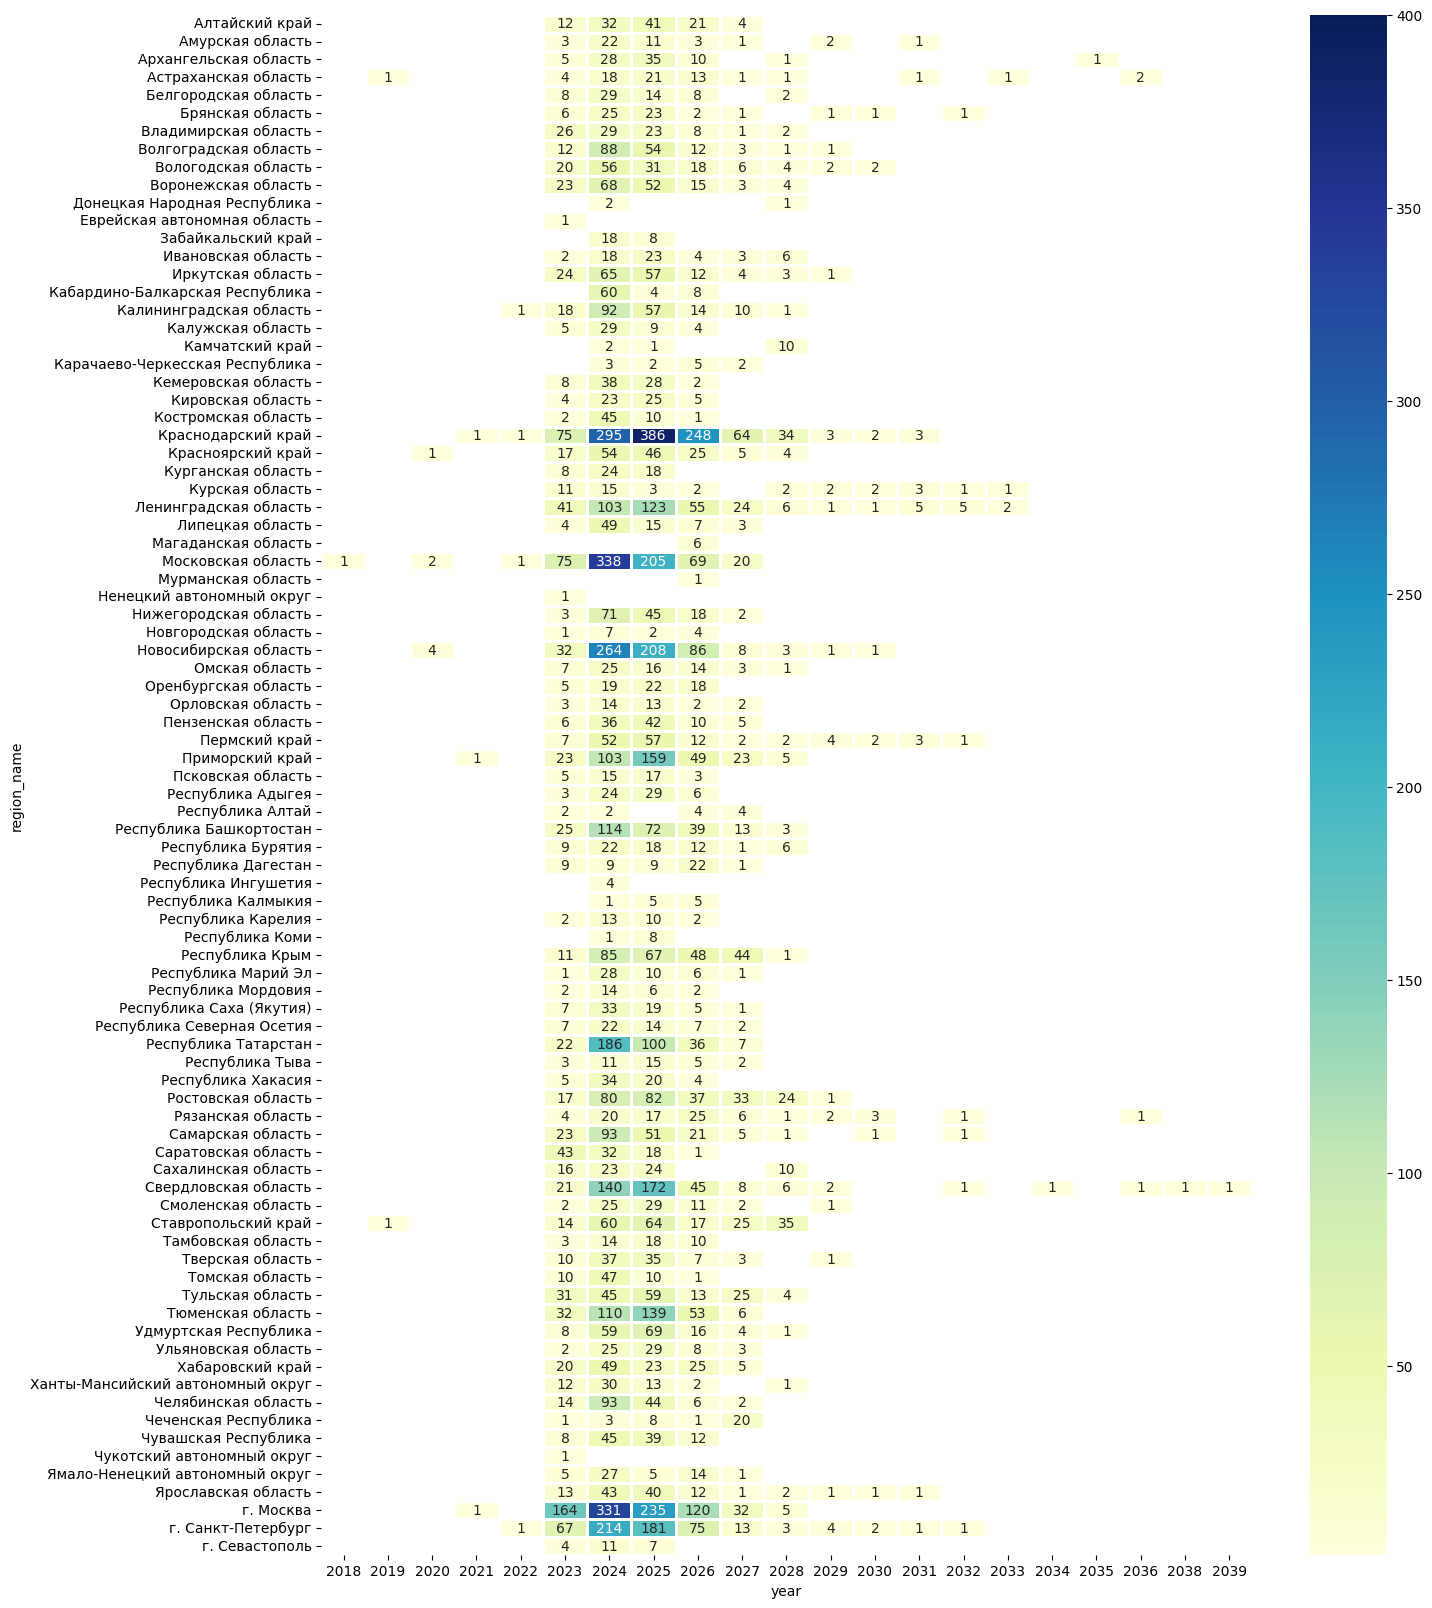

In [113]:
Visualiser(df).make_heatmap(feature_1='region_name',feature_2='year')

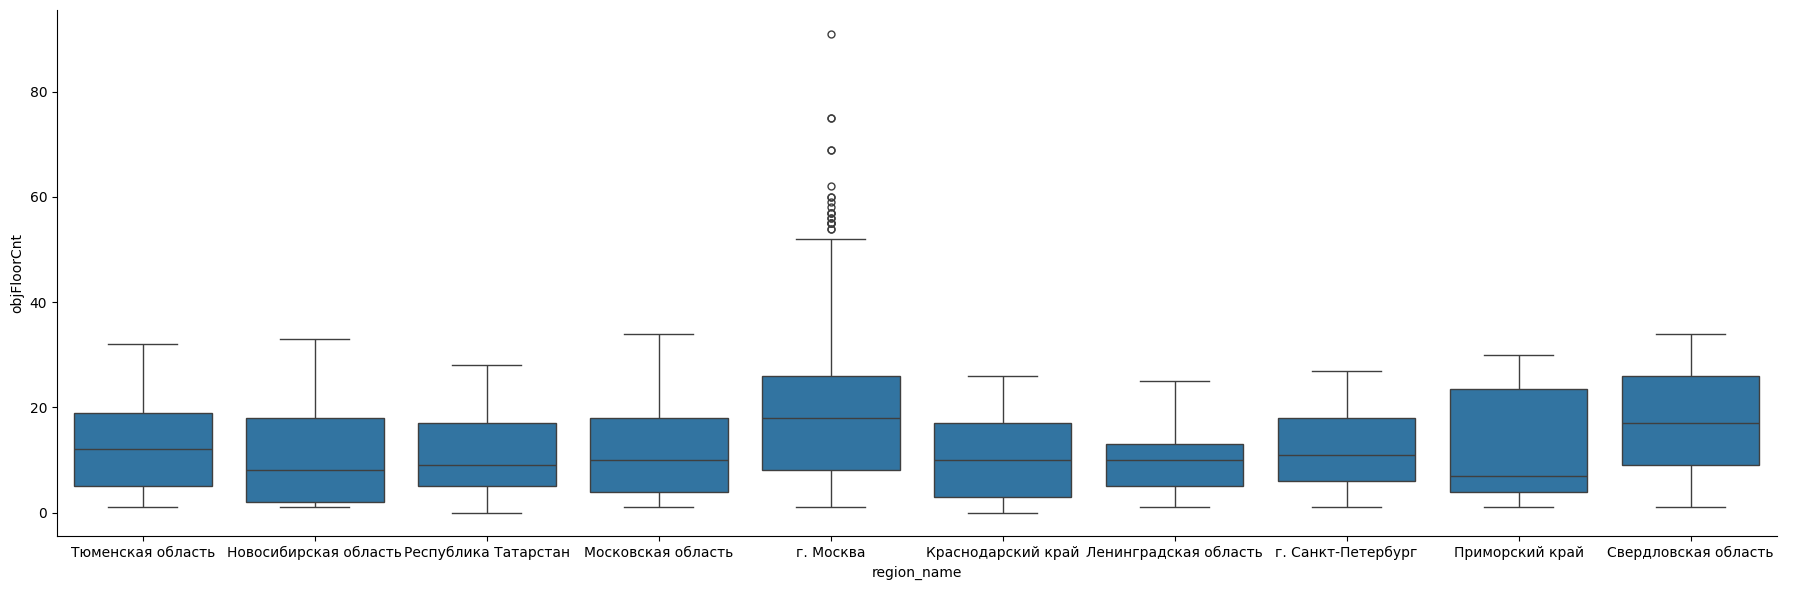

In [121]:
Visualiser(df).make_boxplot(top_n=10,feature='objFloorCnt')

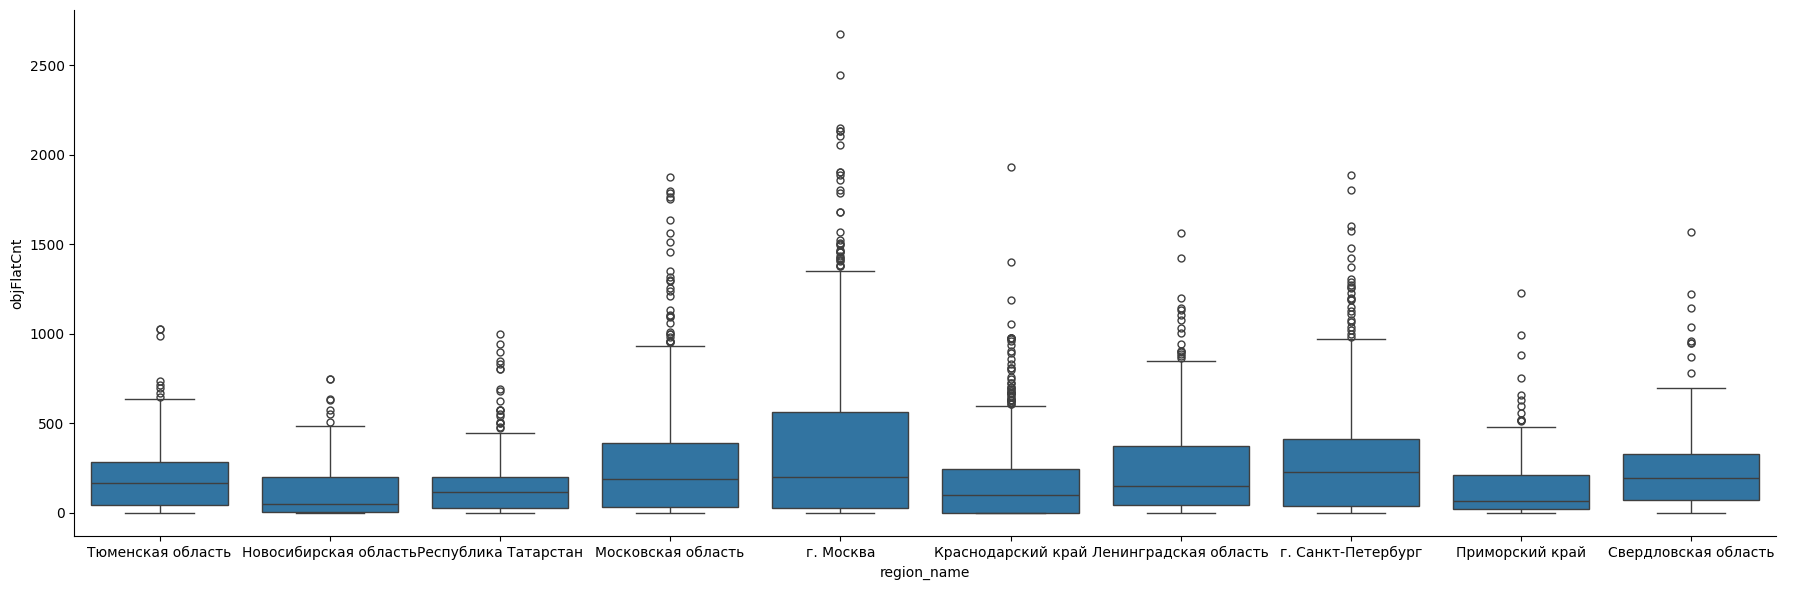

In [122]:
Visualiser(df).make_boxplot(top_n=10,feature='objFlatCnt')

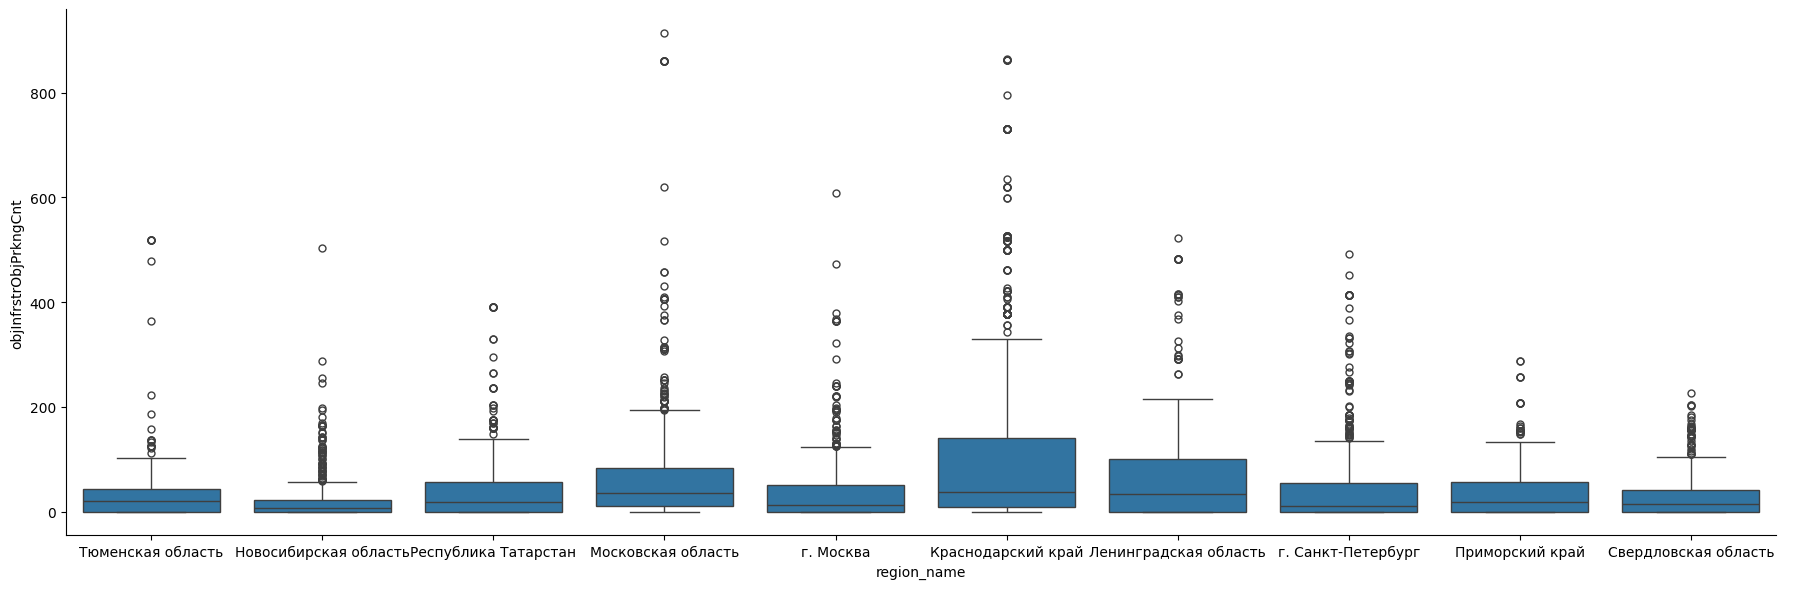

In [123]:
Visualiser(df).make_boxplot(top_n=10,feature='objInfrstrObjPrkngCnt')

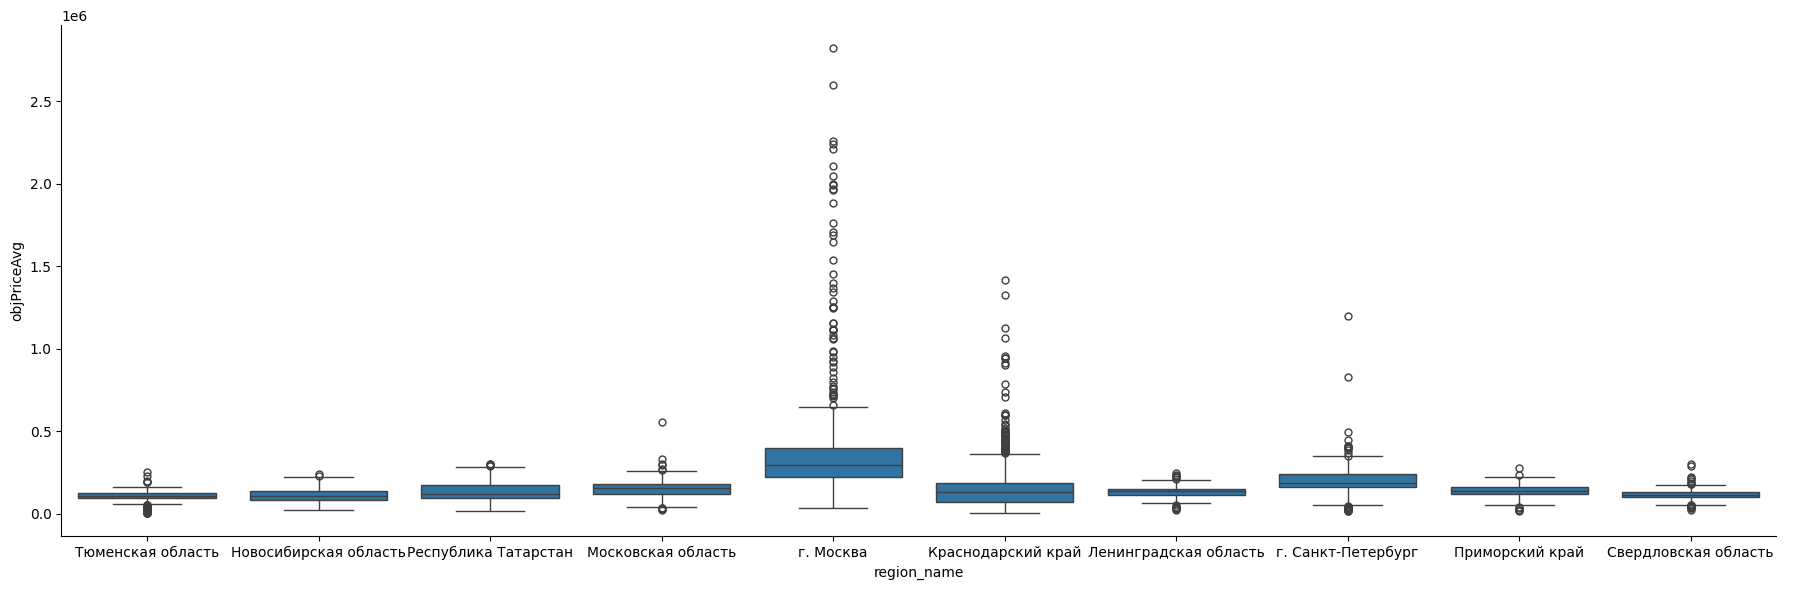

In [124]:
Visualiser(df).make_boxplot(top_n=10,feature='objPriceAvg')